```
This exercise is mainly for practising about data cleaning, 
EDA and simple models. Dataset is about human resource analytics.
Targets are boolean, if employees stay or left the company.
The variables are satisfaction_level, last_evaluation, numbers of project, average monthly hours on working, 
time spend on company, work accidents that occured, promition within the last 5 years,
department, salary.
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Rachel\Desktop\proj\1.human resources analystic\hr\hr.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


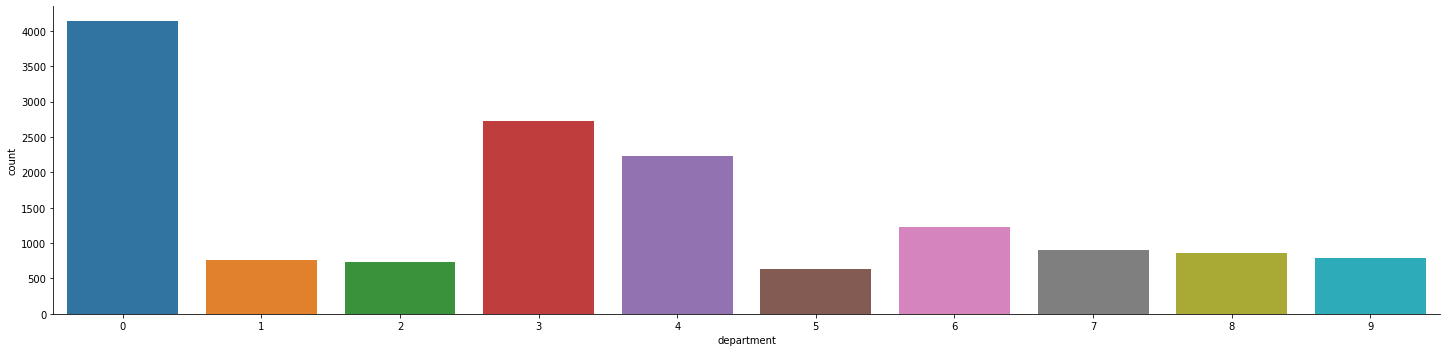

In [134]:
sns.factorplot('department',kind='count',aspect=4, data=df)

In [ ]:
# g = sns.factorplot("Age", data=df, aspect=4, kind="count")
# g.set_xticklabels(rotation=90)
# g = plt.title("Distribution of Ages Among Dental Magic Employees")

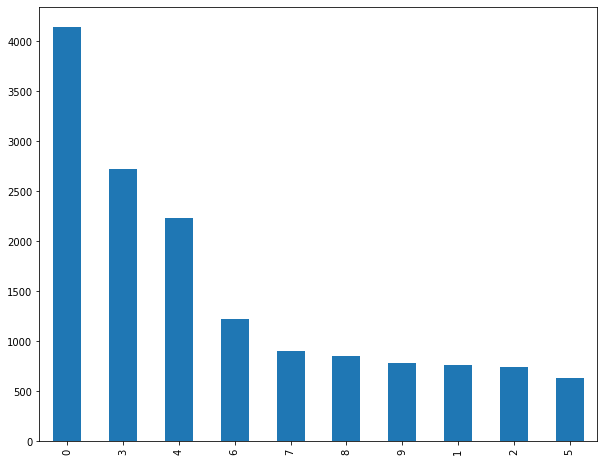

In [138]:
df['department'].value_counts()[0:20].plot(kind='bar',figsize=(10,8))

In [49]:
#check missing values data cleansing 
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [50]:
#df.fillna#find NA

In [142]:
df.groupby('department').size().sort_values(ascending=False).head(10)

department
0    4140
3    2720
4    2229
6    1227
7     902
8     858
9     787
1     767
2     739
5     630
dtype: int64

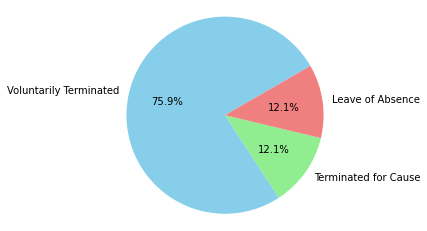

In [143]:
labels = 'Voluntarily Terminated', 'Terminated for Cause', 'Leave of Absence'
sizes = [88, 14, 14]
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.pie(sizes,               
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        startangle=30       
        )

plt.axis('equal')

plt.show()

In [51]:
# get cols
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [52]:
df = df.rename(columns={
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'left'
                        })

In [53]:
##To check the unique numbers of department and salary
df1=df["department"].unique()
df2=df["salary"].unique()
df1

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [54]:
#department, salary convert into numbers
df.replace(df1, np.arange(10), inplace=True)
df.replace(df2, [0,1,2], inplace=True)

In [55]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [56]:
##move left columns to the front
front=df['left']
df.drop(labels='left',axis=1,inplace=True)
df.insert(0,'left',front)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [37]:
corr=df.corr()

In [38]:
df.dtypes

left                      int64
satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
promotion                 int64
department               object
salary                   object
dtype: object

In [39]:
df.shape

(14999, 10)

In [40]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [15]:
df.tail()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
14994,1,0.40,0.57,2,151,3,0,0,4,0
14995,1,0.37,0.48,2,160,3,0,0,4,0
14996,1,0.37,0.53,2,143,3,0,0,4,0
14997,1,0.11,0.96,6,280,4,0,0,4,0
14998,1,0.37,0.52,2,158,3,0,0,4,0


In [45]:
left_rate=df.left.value_counts()/14999
left_rate
#76% stay

0    0.761917
1    0.238083
Name: left, dtype: float64

In [68]:
# 2 demcials 
decimal=lambda x: '%.2f'%x

In [69]:
# #3、EDA
# 1)、starting analysis
left_summary=df.groupby('left')
left_summary.mean().applymap(decimal)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
left,,,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03,3.41,0.65
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01,3.12,0.41


In [70]:
df.applymap(decimal)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1.00,0.38,0.53,2.00,157.00,3.00,0.00,0.00,0.00,0.00
1,1.00,0.80,0.86,5.00,262.00,6.00,0.00,0.00,0.00,1.00
2,1.00,0.11,0.88,7.00,272.00,4.00,0.00,0.00,0.00,1.00
3,1.00,0.72,0.87,5.00,223.00,5.00,0.00,0.00,0.00,0.00
4,1.00,0.37,0.52,2.00,159.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
14994,1.00,0.40,0.57,2.00,151.00,3.00,0.00,0.00,4.00,0.00
14995,1.00,0.37,0.48,2.00,160.00,3.00,0.00,0.00,4.00,0.00
14996,1.00,0.37,0.53,2.00,143.00,3.00,0.00,0.00,4.00,0.00
14997,1.00,0.11,0.96,6.00,280.00,4.00,0.00,0.00,4.00,0.00


In [71]:
#save 2 demicals
df.describe().applymap(decimal)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00


In [72]:
# 2)、correlation analysis

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(df.corr(),
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,
               annot=True,
               linewidths=.5,
               cmap=
              )

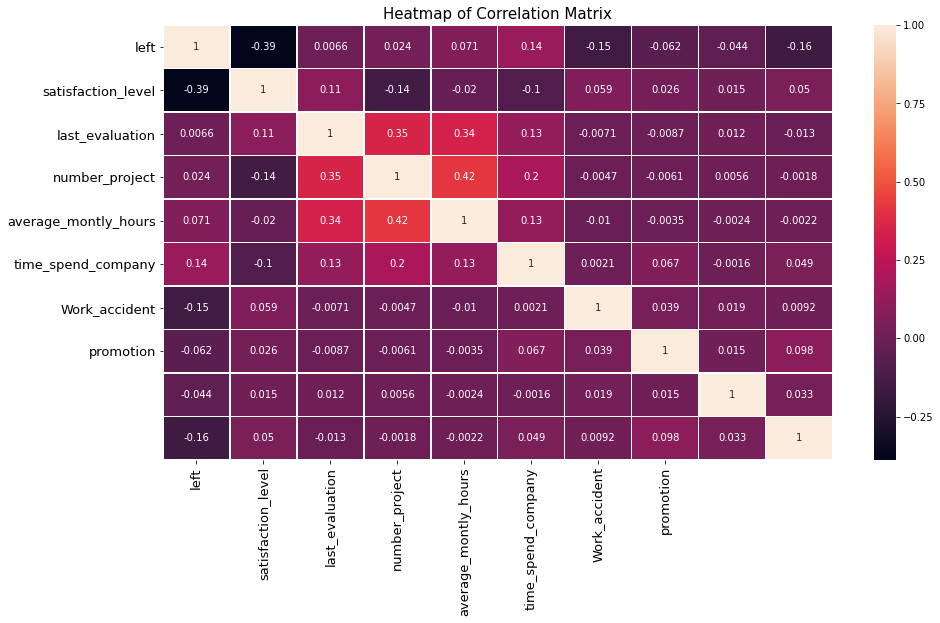

In [75]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(df.corr(),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, 
            linewidths=.5
#             cmap="YlGnBu", 
             )

ax.set_title('Heatmap of Correlation Matrix', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), size=13)
ax.set_yticklabels(ax.get_yticklabels(), size=13)
plt.show()

```
From the heatmap, we can see that number_project, 
average_monthly_hours and last_evaluation have a strong positive correlation.
It tells us if employees spent more time on work and completed more numbers of porject, 
the evlaution will be better.

For the negative aspects,
satisfiction level, work_accident, left and numbers of project have a negative correlation.
It means more work_accident and more projects, the satisfication level will be lower, so that they have more chance to leave the company.
```

In [92]:
new=df.groupby(['left', 'department'])['department'].count().to_frame()

In [93]:
# 3). analysis of attributes
##department  vs  left
depart_left_table=pd.crosstab(index=df['department'],columns=df['left'])
depart_sum=df.groupby(['department']).sum()
depart_sum

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,salary
department,,,,,,,,,
0,1014,2543.81,2938.23,15634,831773,14631,587,100,2310
1,204,446.51,550.49,2934,154292,2702,96,14,483
2,215,442.52,523.84,2701,146828,2480,89,15,449
3,697,1653.48,1961.39,10548,550793,9279,381,28,1549
4,555,1378.19,1611.81,8479,447490,7563,345,20,1224
5,91,391.45,456.12,2432,126787,2711,103,69,675
6,273,758.46,879.55,4683,248119,4256,164,3,701
7,198,558.91,644.71,3434,180369,3135,132,0,519
8,203,530.76,614.23,3164,171073,3063,138,43,536


In [98]:
depart_left_table[1]

department
0    1014
1     204
2     215
3     697
4     555
5      91
6     273
7     198
8     203
9     121
Name: 1, dtype: int64

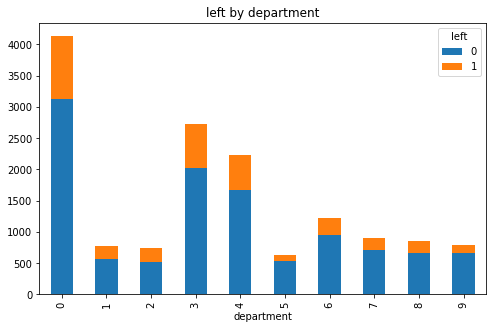

In [96]:
##职位：'sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'
left_rate=depart_left_table[1]/sum(depart_left_table[0], depart_left_table[1])
ax=depart_left_table.plot(kind='bar',figsize=(8,5),stacked=True, title="left by department")
# sns.kdeplot(df[(df["left"]==0)], df["average_montly_hours"], color="r", shade=True,label=' left')
# sns.kdeplot(df[(df['left']==0),df["average_montly_hours"]],color='b',shade=True,label='no left')

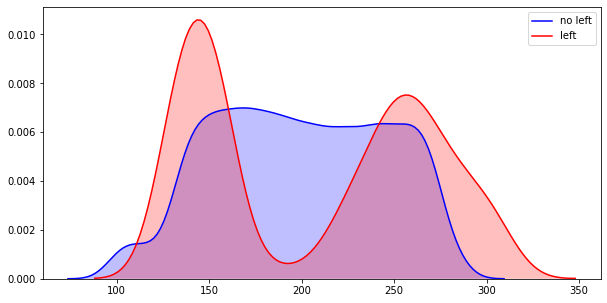

In [102]:
##average_montly_hours  vs  left
hours_left_table=pd.crosstab(index=df['average_montly_hours'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
sns.kdeplot(df.loc[(df['left']==0),'average_montly_hours'],color='b',shade=True,label='no left')
sns.kdeplot(df.loc[(df['left']==1),'average_montly_hours'],color='r',shade=True,label='left')

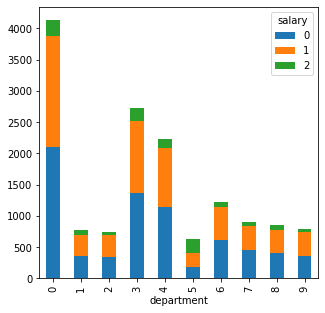

In [145]:
##department  vs  salary
depart_salary_table=pd.crosstab(index=df['department'],columns=df['salary'])
depart_salary_table.plot(kind="bar",figsize=(5,5),stacked=True)


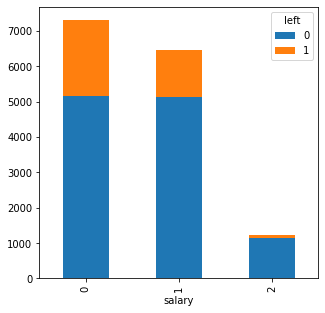

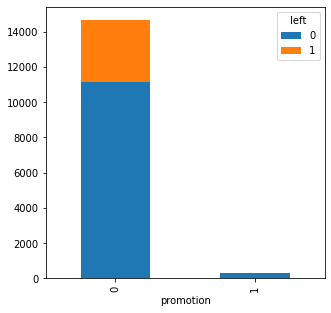

In [45]:
##salary  vs left
salary_left_table=pd.crosstab(index=df['salary'],columns=df['left'])
salary_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
##promotion  vs  left
promotion_left_table=pd.crosstab(index=df['promotion'],columns=df['left'])
promotion_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

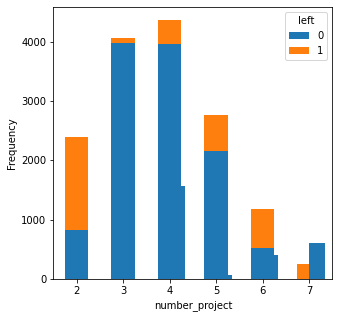

In [47]:
##number_project  vs  left
project_left_table=pd.crosstab(index=df['number_project'],columns=df['left'])
project_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'number_project'].plot(kind='hist',bins=15,stacked=False,alpha=1)

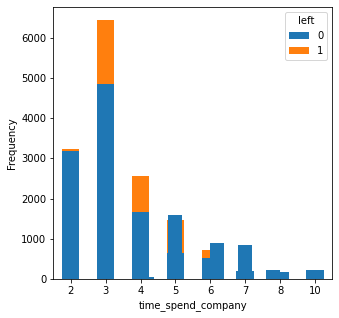

In [49]:
##time_spend_company  vs  left
company_left_table=pd.crosstab(index=df['time_spend_company'],columns=df['left'])
company_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist',bins=10,stacked=False,alpha=1)

In [53]:
df[(df["left"])==0]

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
2000,0,0.58,0.74,4,215,3,0,0,0,0
2001,0,0.82,0.67,2,202,3,0,0,0,0
2002,0,0.45,0.69,5,193,3,0,0,0,0
2003,0,0.78,0.82,5,247,3,0,0,0,0
2004,0,0.49,0.60,3,214,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14206,0,0.90,0.55,3,259,10,1,1,5,2
14207,0,0.74,0.95,5,266,10,0,1,5,2
14208,0,0.85,0.54,3,185,10,0,1,5,2
14209,0,0.33,0.65,3,172,10,0,1,8,2


Text(0.5, 0, 'b')

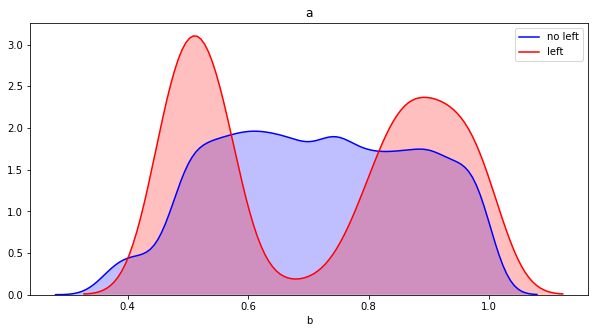

In [118]:
##last_evaluation  vs  left
evaluation_left_table=pd.crosstab(index=df['last_evaluation'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
left=sns.kdeplot(df.loc[(df['left']==0),'last_evaluation'],color='b',shade=True,label='no left')
left=sns.kdeplot(df.loc[(df['left']==1),'last_evaluation'],color='r',shade=True,label='left')
left.set_title('a')
left.set_xlabel('b')

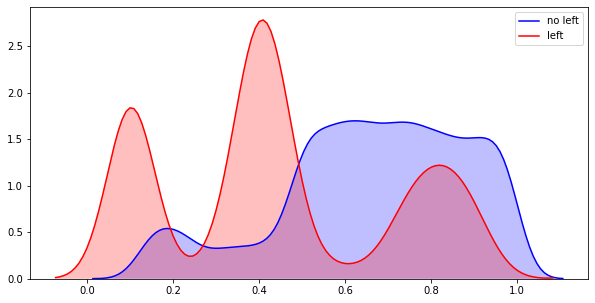

In [119]:
##satisfaction_level  vs  left  
satis_left_table=pd.crosstab(index=df['satisfaction_level'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
left=sns.kdeplot(df.loc[(df['left']==0),'satisfaction_level'],color='b',shade=True,label='no left')
left=sns.kdeplot(df.loc[(df['left']==1),'satisfaction_level'],color='r',shade=True,label='left')

C:\Users\Rachel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


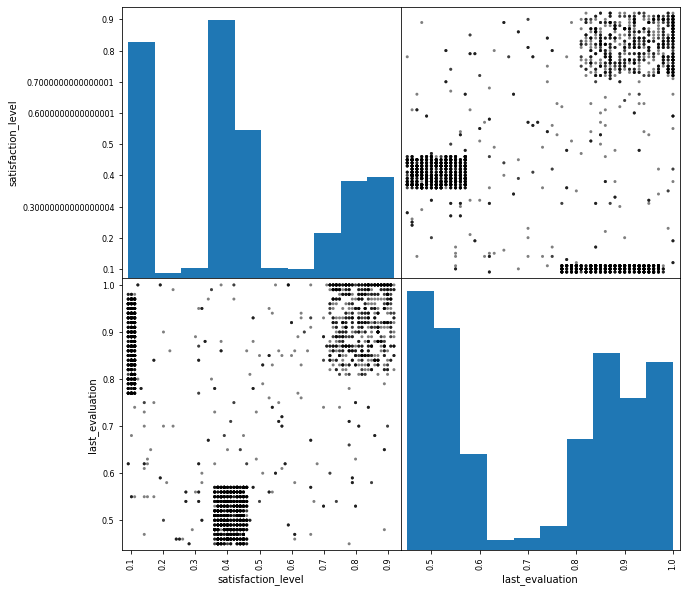

In [121]:
##last_evaluation  vs  satisfaction_level
df1=df[df['left']==1]
fig, ax = plt.subplots(figsize=(10,10))
pd.plotting.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)
plt.show()
# plt.savefig('scatter.png',dpi=1000,bbox_inches='tight')